<a href="https://colab.research.google.com/github/leeju0/AI_study/blob/main/%5B1%5D%EB%8D%94_%EB%82%98%EC%9D%80_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EB%A7%8C%EB%93%A4%EA%B8%B0_%ED%9D%89%EB%B6%80_%EC%88%98%EC%88%A0_%ED%9B%84_%EC%83%9D%EC%A1%B4_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

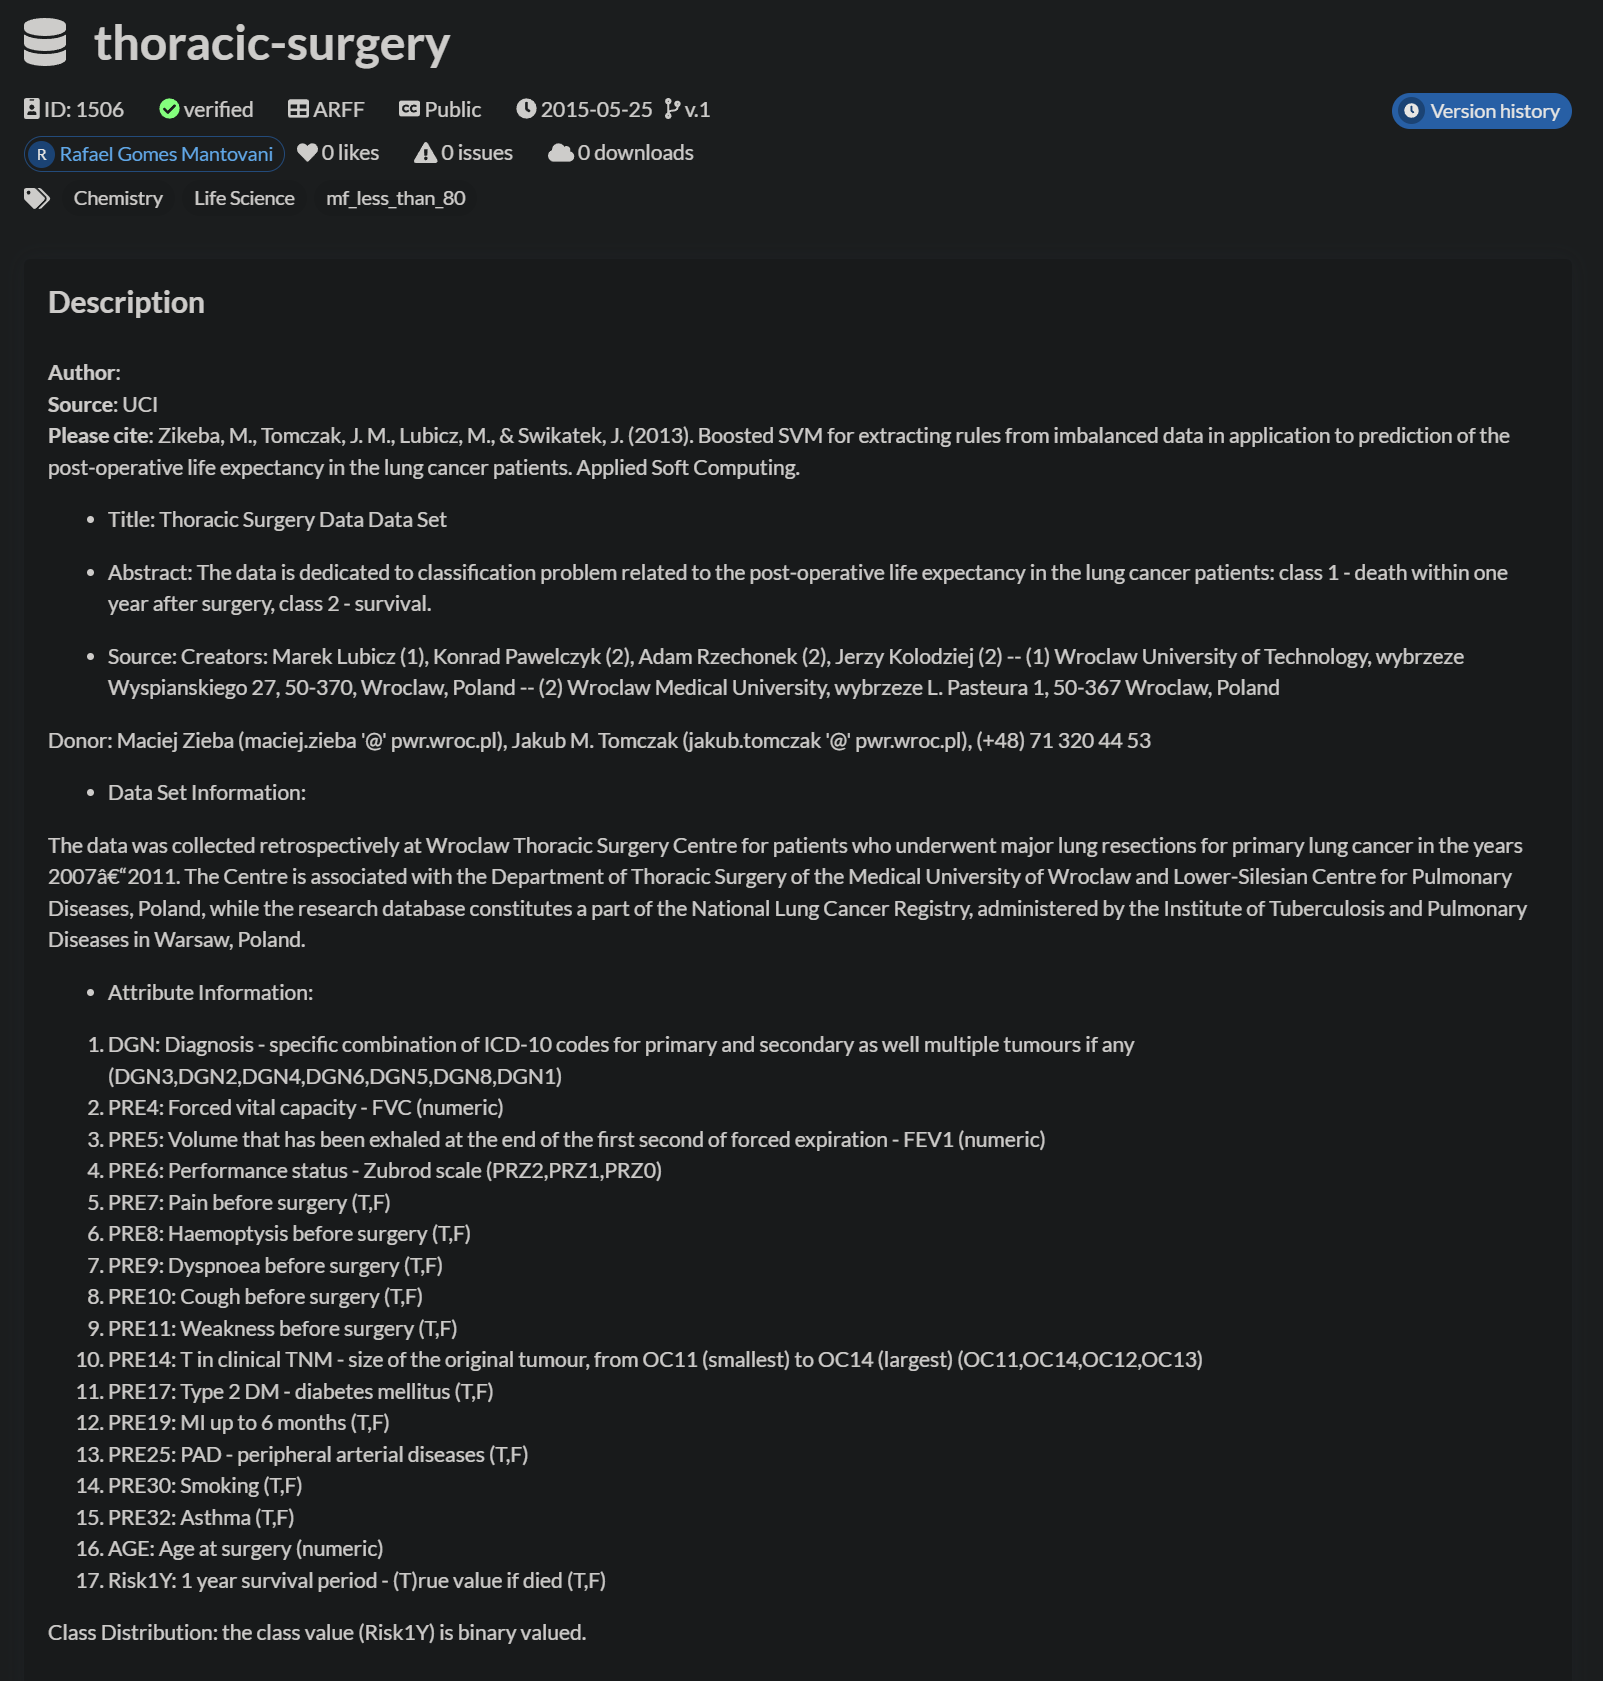

### 1. 데이터 알아보기

In [ ]:
## https://www.openml.org/search?type=data&sort=runs&id=1506&status=active
## 깃허브에서 데이터를 불러옵니다.
!git clone https://github.com/Ho12615054/Hans_Farm.git

data_set = pd.read_csv("./Hans_Farm/Data/Thoraric_Surgery.csv", delimiter=",")
data_set

Cloning into 'Hans_Farm'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (41/41), 105.06 KiB | 4.20 MiB/s, done.


,Unnamed: 0,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Y
0,0,1.0,2.88,2.16,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,60.0,0.0
1,1,2.0,3.40,1.88,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,51.0,0.0
2,2,2.0,2.76,2.08,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.0,0.0
3,3,2.0,3.68,3.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0
4,4,2.0,2.44,0.96,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,73.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,465,1.0,3.88,2.12,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,63.0,0.0
466,466,2.0,3.76,3.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0,0.0
467,467,2.0,3.04,2.08,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0
468,468,2.0,1.96,1.68,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,0.0


In [ ]:
## 불필요한 열(Column)을 제거합니다.
data_set = data_set.iloc[:,1:]
data_set

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Y
0,1.0,2.88,2.16,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,60.0,0.0
1,2.0,3.40,1.88,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,51.0,0.0
2,2.0,2.76,2.08,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.0,0.0
3,2.0,3.68,3.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0
4,2.0,2.44,0.96,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,73.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1.0,3.88,2.12,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,63.0,0.0
466,2.0,3.76,3.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0,0.0
467,2.0,3.04,2.08,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0
468,2.0,1.96,1.68,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,0.0


In [ ]:
## y = W*x + b
## 데이터를 나누어서 지정합니다.
x = data_set.iloc[:,0:16]    # 데이터
y = data_set.iloc[:,16]      # 1 year survival period - (T)rue value if died (T,F)
x

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
0,1.0,2.88,2.16,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,60.0
1,2.0,3.40,1.88,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,51.0
2,2.0,2.76,2.08,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.0
3,2.0,3.68,3.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0
4,2.0,2.44,0.96,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1.0,3.88,2.12,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,63.0
466,2.0,3.76,3.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.0
467,2.0,3.04,2.08,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,52.0
468,2.0,1.96,1.68,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0


### 2. 학습과 시험용 데이터세트를 나누기

In [ ]:
## 학습 데이터와 테스트 데이터로 나눕니다.
## 데이터를 나누는 비율은 10% 입니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)
x_train

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
98,2.0,2.63,67.30,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,54.0
97,5.0,3.04,2.40,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,76.0
21,3.0,3.32,2.84,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,62.0
436,2.0,4.80,3.32,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,54.0
327,2.0,2.52,1.92,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,3.40,2.12,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,62.0
418,1.0,2.60,2.04,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,70.0
402,2.0,2.96,2.20,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,53.0
83,2.0,2.84,2.36,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 3. 인공지능 모델

In [ ]:
# 딥러닝 모델의 구조를 설계합니다.
model2 = Sequential()
model2.add(Dense(8, input_dim=16, activation='relu'))
model2.add(Dense(4,  activation='relu'))

model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 8)                 136       
                                                                 
 dense_41 (Dense)            (None, 4)                 36        
                                                                 
 dense_42 (Dense)            (None, 1)                 5         
                                                                 
Total params: 177 (708.00 Byte)
Trainable params: 177 (708.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델을 학습시킵니다.
model2.compile(optimizer ='adam', loss = 'mean_squared_error', metrics=['accuracy'])
y_pred = model2.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
14/14 [==============================] - 1s 4ms/step - loss: 0.1589 - accuracy: 0.8392
Epoch 2/50
14/14 [==============================] - 0s 3ms/step - loss: 0.1557 - accuracy: 0.8440
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.1551 - accuracy: 0.8440
Epoch 4/50
14/14 [==============================] - 0s 6ms/step - loss: 0.1515 - accuracy: 0.8440
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 0.1364 - accuracy: 0.8440
Epoch 6/50
14/14 [==============================] - 0s 7ms/step - loss: 0.1335 - accuracy: 0.8392
Epoch 7/50
14/14 [==============================] - 0s 6ms/step - loss: 0.1324 - accuracy: 0.8416
Epoch 8/50
14/14 [==============================] - 0s 5ms/step - loss: 0.1313 - accuracy: 0.8392
Epoch 9/50
14/14 [==============================] - 0s 6ms/step - loss: 0.1308 - accuracy: 0.8416
Epoch 10/50
14/14 [==============================] - 0s 5ms/step - loss: 0.1310 - accuracy: 0.8416
Epoch 11/50
14/14 [

### 4. 시험보기

In [ ]:
## 모델에 시험 데이터를 넣어보자
y_pred = model2.predict(x_test)

## Sigmoid 적용
y_pred = y_pred.flatten() # 차원 펴주기
y_pred = np.where(y_pred > 0.5, 1.0, 0.0) #0.5보다크면 1.0, 작으면 0.0
y_pred

2/2 [==============================] - 0s 5ms/step


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:

from sklearn.metrics import accuracy_score
print('정확도:',accuracy_score(y_test, y_pred))

정확도: 0.9361702127659575


### 데이터의 상관 관계를 함께 고려하자

In [ ]:
# 데이터 사이의 상관 관계를 확인합니다.
corr=data_set.corr()
corr_sort=corr.sort_values('Risk1Y', ascending=False)

# 사망 결과와 가장 관련도 높은 데이터 5개를 확인합니다.
corr_sort['Risk1Y'].head(8)

Risk1Y    1.000000
PRE14     0.174371
PRE17     0.108974
PRE9      0.105530
PRE6      0.093200
PRE10     0.088860
PRE11     0.086467
PRE30     0.085958
Name: Risk1Y, dtype: float64

In [ ]:
## X: Risk1Y 열과 가장 관련도 높은 5개의 열(자신 제외)
## Y: Risk1Y 열

x = data_set[corr_sort['Risk1Y'].head(8).index[1:]]
y = data_set['Risk1Y']
x

,PRE14,PRE17,PRE9,PRE6,PRE10,PRE11,PRE30
0,3.0,0.0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
465,2.0,0.0,0.0,1.0,1.0,0.0,1.0
466,0.0,0.0,0.0,0.0,0.0,0.0,1.0
467,2.0,0.0,0.0,1.0,1.0,0.0,0.0
468,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [ ]:
## 학습 데이터와 테스트 데이터로 나눕니다.
## 데이터를 나누는 비율은 10% 입니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)
x_train

,PRE14,PRE17,PRE9,PRE6,PRE10,PRE11,PRE30
90,1.0,0.0,0.0,1.0,1.0,0.0,1.0
95,0.0,0.0,0.0,1.0,1.0,0.0,1.0
371,1.0,0.0,0.0,0.0,0.0,0.0,0.0
251,0.0,0.0,0.0,2.0,1.0,1.0,1.0
347,2.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
221,1.0,0.0,0.0,1.0,1.0,0.0,1.0
443,0.0,0.0,0.0,2.0,1.0,1.0,0.0
7,0.0,0.0,0.0,1.0,1.0,0.0,1.0
212,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
# 딥러닝 모델의 구조를 설계합니다.
model = Sequential()
model.add(Dense(10, input_dim=7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 10)                80        
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델을 학습시킵니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error', metrics=['accuracy'])
y_pred = model.fit(x_train, y_train, epochs=200, batch_size=16)

Epoch 1/200
27/27 [==============================] - 1s 3ms/step - loss: 0.2449 - accuracy: 0.6643
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 0.2262 - accuracy: 0.7589
Epoch 3/200
27/27 [==============================] - 0s 3ms/step - loss: 0.2091 - accuracy: 0.8274
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1924 - accuracy: 0.8416
Epoch 5/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1786 - accuracy: 0.8487
Epoch 6/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1663 - accuracy: 0.8487
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1565 - accuracy: 0.8487
Epoch 8/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1496 - accuracy: 0.8487
Epoch 9/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1453 - accuracy: 0.8487
Epoch 10/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1425 - accuracy: 0.8487
Epoch 11/

In [ ]:
## 모델에 시험 데이터를 넣어보자
y_pred = model.predict(x_test)

## Sigmoid 적용
y_pred = y_pred.flatten() # 차원 펴주기
y_pred = np.where(y_pred > 0.5, 1.0, 0.0) #0.5보다크면 1.0, 작으면 0.0

from sklearn.metrics import accuracy_score
print('정확도:',accuracy_score(y_test, y_pred))

2/2 [==============================] - 0s 4ms/step
정확도: 1.0


### 5. 실습: 정확도 88% 이상 확인되면 퇴근!!